# Predictive Analysis for Credit Card Default Prevention at Bank Danamon

In the modern financial landscape, credit card defaults pose a significant challenge for banks and financial institutions. The ability to predict and manage these defaults is crucial for maintaining a healthy credit portfolio and minimizing financial losses. This project focuses on the context of Bank Danamon, where we aim to address the issue of credit card payment defaults by leveraging data analysis and predictive modeling techniques.

The main aim of this project is to create a strong predictive model capable of precisely predicting the probability of credit card defaults among the varied customer base of Bank Danamon. By thoroughly analyzing historical transaction records, demographic factors, previous payment patterns, and financial markers, this model strives to offer valuable predictive insights. These insights empower the bank to adopt proactive approaches in recognizing customers with higher risk profiles and enacting customized risk management tactics. By utilizing the potential of data-derived insights, Bank Danamon intends to ensure its financial integrity and concurrently enhance customer contentment by refining credit risk evaluation and control procedures.

---
[Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)


## Introduction

Nadhifa Safira (HCK006)

After transitioning from Digital Marketing to Data Science through the Hacktiv8 Bootcamp, I bring over a year of media industry experience in consumer behavior, data analytics, and strategic marketing. Proficient in Python, SQL, and data visualization, I excel at extracting insights and optimizing campaigns. My track record includes driving data-driven decisions and I'm excited to contribute my diverse skills and passion to the dynamic field of Data Science.


---

Problem Statement:

``` Foreseeing credit card payment defaults among clients of Bank Danamon. ```

Objective:

The primary goal is to decrease the count of customers labeled as defaults at Bank Danamon. Additionally, the objective involves creating an accurate predictive model that anticipates the probability of credit card defaults among Bank Danamon's clientele. This model leverages historical data, demographic factors, payment patterns, and financial indicators to offer actionable insights. These insights empower the bank to proactively recognize high-risk customers and implement strategies to manage risks effectively, thereby reducing potential credit losses.

## External Link

Deploy link: https://huggingface.co/spaces/nadhifarares/default_prediction

## Working Area



> Data Overview
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)



In [1]:
from google.colab import files
!pip install -q kaggle
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json
total 4
-rw------- 1 root root 64 Aug 13 05:46 kaggle.json
{"username":"dhifassi","key":"d45423411cb93a0ec83b11f5310b9a9b"}

In [2]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

100% 0.98M/0.98M [00:00<00:00, 1.46MB/s]
100% 0.98M/0.98M [00:00<00:00, 1.46MB/s]


In [3]:
!unzip -q /content/default-of-credit-card-clients-dataset.zip

### Import Library

In [4]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.0 MB/s eta 0:00:00


In [5]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.3 MB/s eta 0:00:00


In [6]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 51.1 MB/s eta 0:0

In [7]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import numpy as np
import phik
from phik.report import plot_correlation_matrix

#Preprocessing and Modelling
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier as xgb_classifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC


#Save Modelling
import joblib


import warnings
warnings.filterwarnings(action='ignore')


### Data Loading & Overview

In [8]:
#Import csv and change into dataframe
df_raw = pd.read_csv('/content/UCI_Credit_Card.csv')

In [9]:
df_raw.info() #see the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df_raw.head(10) #first 10 data from the dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [11]:
df_raw.tail(10) #last 10 data from the dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29990,29991,140000.0,1,2,1,41,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29991,29992,210000.0,1,2,1,34,3,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29992,29993,10000.0,1,3,1,43,0,0,0,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [12]:
df_raw.isnull().sum() #checking if there's any missing values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no missing values on the dataset.

In [13]:
df_raw.duplicated().sum()

0

There are no duplicate datas either.

In [14]:
#delete whitespace in all column
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':
        df_raw[col] = df_raw[col].str.strip()

Deleting all the whitespaces that might occur on the dataframe.

### Exploratory Data Analysis

In [15]:
df_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Key Insights:

1. The majority of customers in the dataset are female.
2. The average limit balance held by customers is approximately 167,484 million New Taiwan dollars.
3. Most of the customers are students, as indicated by the median 'education' value, which predominantly corresponds to 'University' education.
4. Bank Danamon's customer age range spans from 21 to 79 years.
5. The dataset covers data from April 2005 to August 2005.

In [16]:
#Renaming df_raw for convenience
df_raw.rename(columns={'ID': 'cust_id', 'LIMIT_BAL': 'limit_balance','SEX' : 'sex', 'EDUCATION' : 'education', 'MARRIAGE':'marriage', 'AGE' : 'age', 'PAY_0' : 'pay_0', 'PAY_2' : 'pay_2', 'PAY_3' : 'pay_3', 'PAY_4' : 'pay_4', 'PAY_5' : 'pay_5', 'PAY_6' : 'pay_6', 'BILL_AMT1' : 'bill_amt1', 'BILL_AMT2' : 'bill_amt2', 'BILL_AMT3' : 'bill_amt3', 'BILL_AMT4' : 'bill_amt4', 'BILL_AMT5' : 'bill_amt5', 'BILL_AMT6' : 'bill_amt6', 'PAY_AMT1' : 'pay_amt1', 'PAY_AMT2' : 'pay_amt2', 'PAY_AMT3' : 'pay_amt3', 'PAY_AMT4' : 'pay_amt4', 'PAY_AMT5' : 'pay_amt5', 'PAY_AMT6' : 'pay_amt6', 'default.payment.next.month' : 'default'}, inplace=True)
df_raw

,cust_id,limit_balance,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


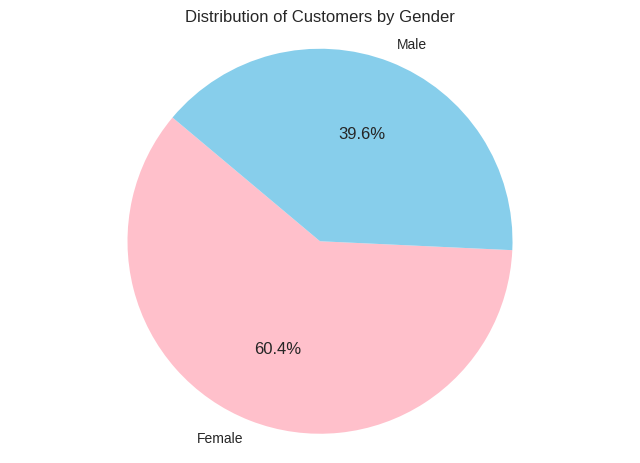

In [17]:
#Calculate the counts of each gender
gender_counts = df_raw['sex'].value_counts()
labels = ['Female', 'Male']

#Create a pie chart
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Distribution of Customers by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Based on the information presented in the pie chart, it can be inferred that the majority of customers, accounting for 60.4%, are female. The remaining 39.6% of customers are male.

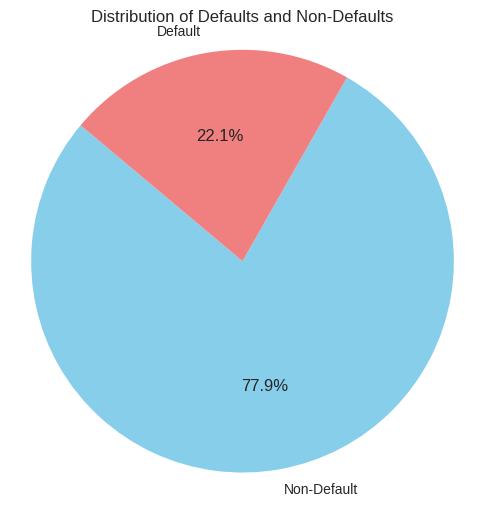

In [18]:
#Calculate the counts of default and non-default cases
default_counts = df_raw['default'].value_counts()
labels = ['Non-Default', 'Default']

#Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Defaults and Non-Defaults')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


Around 77.9% of customers are in a secure position without any instances of credit card default. However, for the remaining 22.1% of customers, their credit cards have been subjected to default due to the failure to honor timely credit card payments. This situation arises when the specified payment deadlines for their credit card balances are not met, leading to the unfortunate consequence of credit card freezing as a measure to ensure compliance with payment terms. This contrast in the distribution highlights the significance of managing credit card payment obligations to avoid potential adverse consequences.

In [19]:
df_raw.default.value_counts() #checking value counts

0    23364
1     6636
Name: default, dtype: int64

An imbalance is noticeable between the two categories within the dataset. The data consists of 23,364 instances where clients are not facing defaults, while 6,636 instances are categorized as defaults.

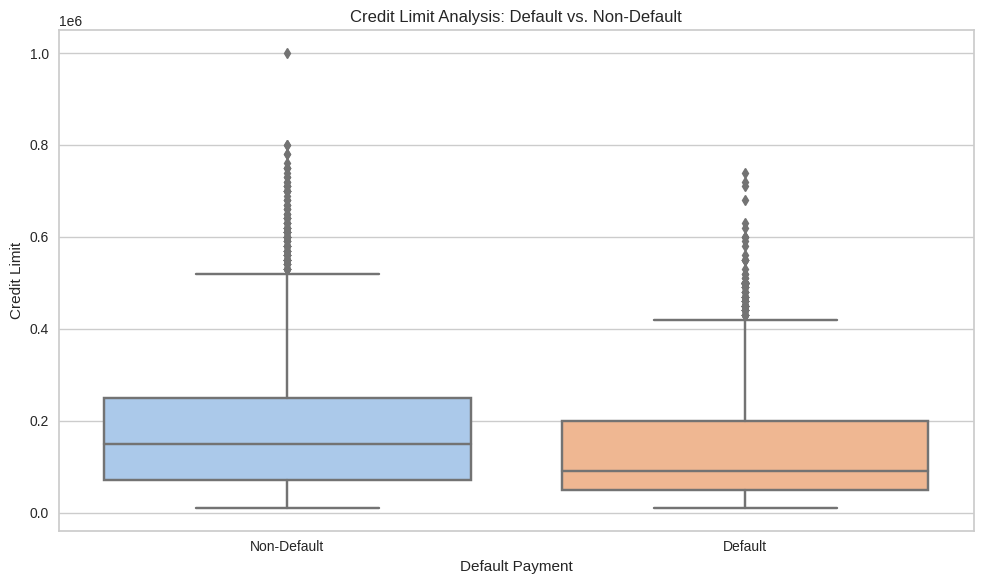

In [20]:
#Create a box plot for Credit Limit Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='limit_balance', data=df_raw, palette='pastel')
plt.title('Credit Limit Analysis: Default vs. Non-Default')
plt.xlabel('Default Payment')
plt.ylabel('Credit Limit')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.tight_layout()
plt.show()

The boxplot illustrates a notable trend: customers with higher credit card limits are less likely to default. Conversely, those who default tend to have lower credit limits. This relationship underscores the potential influence of credit limits on default behavior, suggesting that higher credit limits may contribute to better financial management and reduced default risk.

In [21]:
df_eda = df_raw.copy()

In [22]:
#To see the unique value for combining the values into 3 different age group
unique_age_values = df_eda['age'].unique()
unique_age_values_sorted = sorted(unique_age_values)

print(unique_age_values_sorted)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]


In [23]:
#Combining into 3 different age group
agegroup = []

for agr1 in df_eda['age']:
    if agr1 in [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,]:
        agegroup.append('Young Adults')
    elif agr1 in [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]:
        agegroup.append('Adults')
    else:
        agegroup.append('Retire')

df_eda['age'] = agegroup

df_eda

,cust_id,limit_balance,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,Young Adults,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,Young Adults,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,Young Adults,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,Young Adults,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,Adults,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,Young Adults,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,Adults,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,Young Adults,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,Adults,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


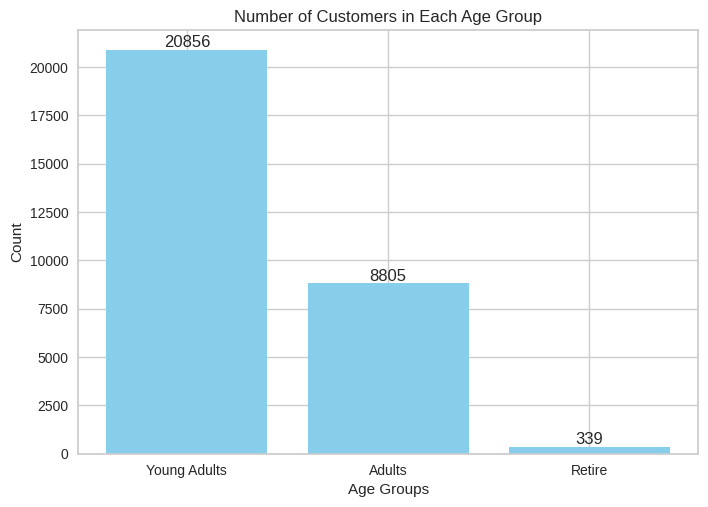

In [24]:
#Value counts of each age group
age_group_counts = df_eda['age'].value_counts()

#Create a bar plot
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')

#Add x-axis label and y-axis label
plt.xlabel('Age Groups')
plt.ylabel('Count')

#Add a title
plt.title('Number of Customers in Each Age Group')

#Display the numbers on the bars
for index, value in enumerate(age_group_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

#Display the chart
plt.show()

In Bank Danamon, the distribution of customers across different age groups provides interesting insights. Among the total of 30,000 customers, a substantial portion of 20,865 individuals falls within the Young Adults age group, ranging from 21 to 39 years. This signifies a significant representation, suggesting a relatively youthful customer base. The Adult age group, comprising individuals between 40 and 59 years, consists of 8,805 customers. Lastly, the Retire age group, which encompasses customers aged 60 and above, constitutes a smaller subset of the customer base, with 339 individuals. This demographic breakdown provides a valuable perspective on the distribution of customers based on their age, potentially aiding the bank in tailoring its services and strategies to cater to the preferences and needs of each age group.

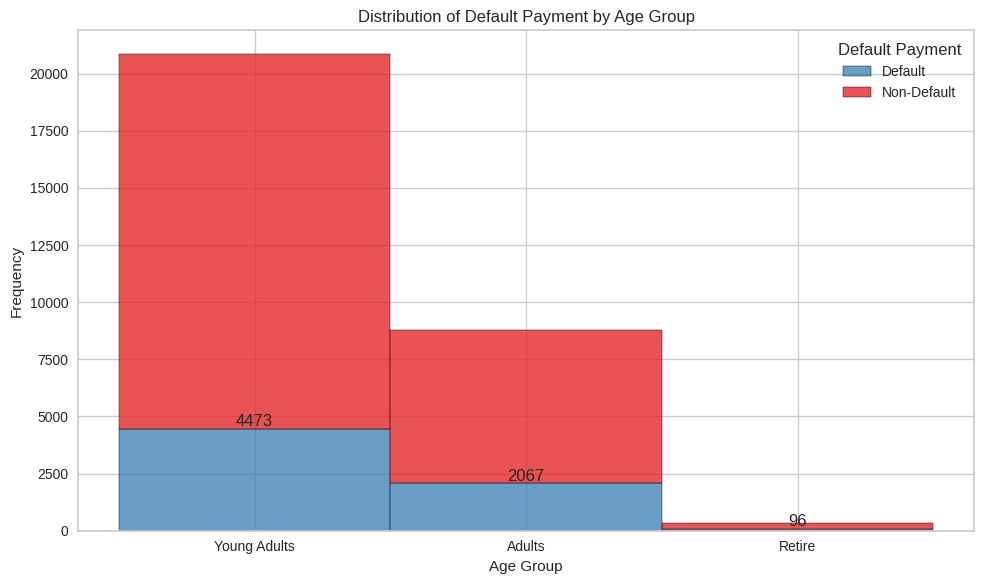

In [25]:
# Distribution of 'default' according to age group

# Define the age groups
age_groups = ['Young Adults', 'Adults', 'Retire']

# Group the data by 'age' and 'default', and calculate the counts
age_default_counts = df_eda.groupby(['age', 'default']).size().unstack()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda, x='age', hue='default', multiple='stack', bins=len(age_groups), palette='Set1')

# Display the counts for the 'Default' category
for i, age_group in enumerate(age_groups):
    default_count = age_default_counts.loc[age_group, 1]
    plt.text(i, default_count + 100, str(default_count), ha='center')

plt.title('Distribution of Default Payment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Default Payment', labels=['Default', 'Non-Default'])
plt.xticks(range(len(age_groups)), age_groups)
plt.tight_layout()

plt.show()


While the default rate among customers stands at 22.1%, this is a matter of concern as our primary objective was to decrease the count of customers encountering defaults. It's evident that a majority of defaults are occurring within the age categories of 'Young Adults' and 'Adults.'

Within the default group, 4473 customers belong to the young adult age group, 2067 are from the adult age group, and an additional 96 customers are from the retire age group.

age
Adults          53834.757865
Retire          65678.820059
Young Adults    49885.872842
Name: bill_amt1, dtype: float64


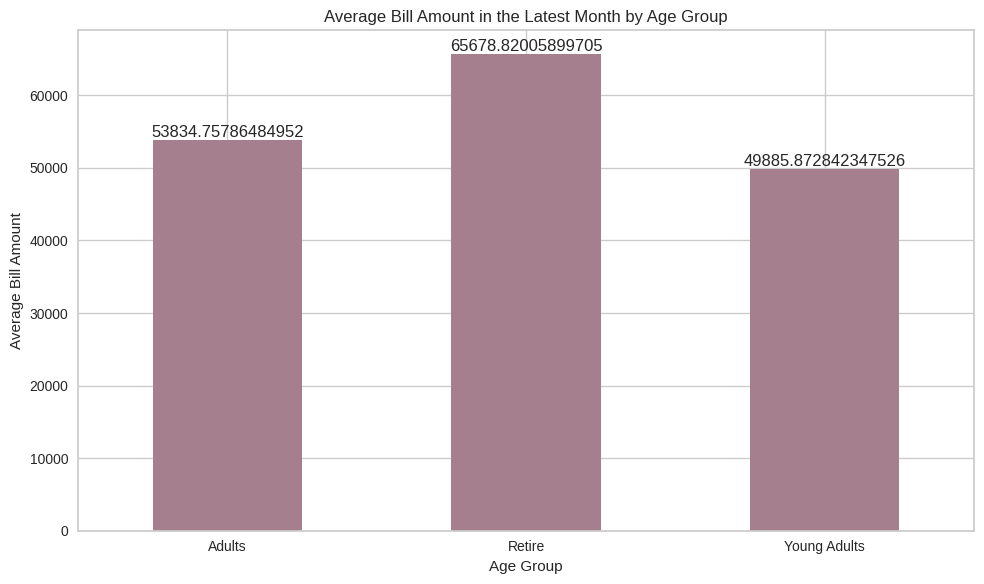

In [26]:
#Average of the latest month's bill of customers based on their age group.
mean_bill_amt1_by_age = df_eda.groupby('age')['bill_amt1'].mean()
print(mean_bill_amt1_by_age)

#Create a plot
plt.figure(figsize=(10, 6))
mean_bill_amt1_by_age.plot(kind='bar', color='#A67F8E')
plt.title("Average Bill Amount in the Latest Month by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Bill Amount")
plt.xticks(rotation=0)
plt.tight_layout()

#Display the numbers on the bars
for index, value in enumerate(mean_bill_amt1_by_age.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

The bar plot reveals intriguing patterns in customer spending behavior based on age groups. Among these, the 'Retire' age group stands out with the highest average bill amount of approximately 65,679 NT dollars for the latest month. This finding suggests that retirees might have distinct spending preferences or financial commitments. In contrast, the 'Young Adults' age category exhibits the lowest average bill amount, hovering around 49,886 NT dollars. This lower spending could reflect the financial constraints typically faced by younger individuals. Meanwhile, the 'Adults' age group demonstrates an intermediate average bill amount of about 53,835 NT dollars. This observation highlights the diversity of spending habits across age segments, which could be influenced by varying factors like income levels, family responsibilities, and lifestyle choices.

### Feature Engineering

#### *Feature Selection*

interval columns not set, guessing: ['cust_id', 'limit_balance', 'sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default']
interval columns not set, guessing: ['cust_id', 'limit_balance', 'sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default']
interval columns not set, guessing: ['cust_id', 'limit_balance', 'sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default']


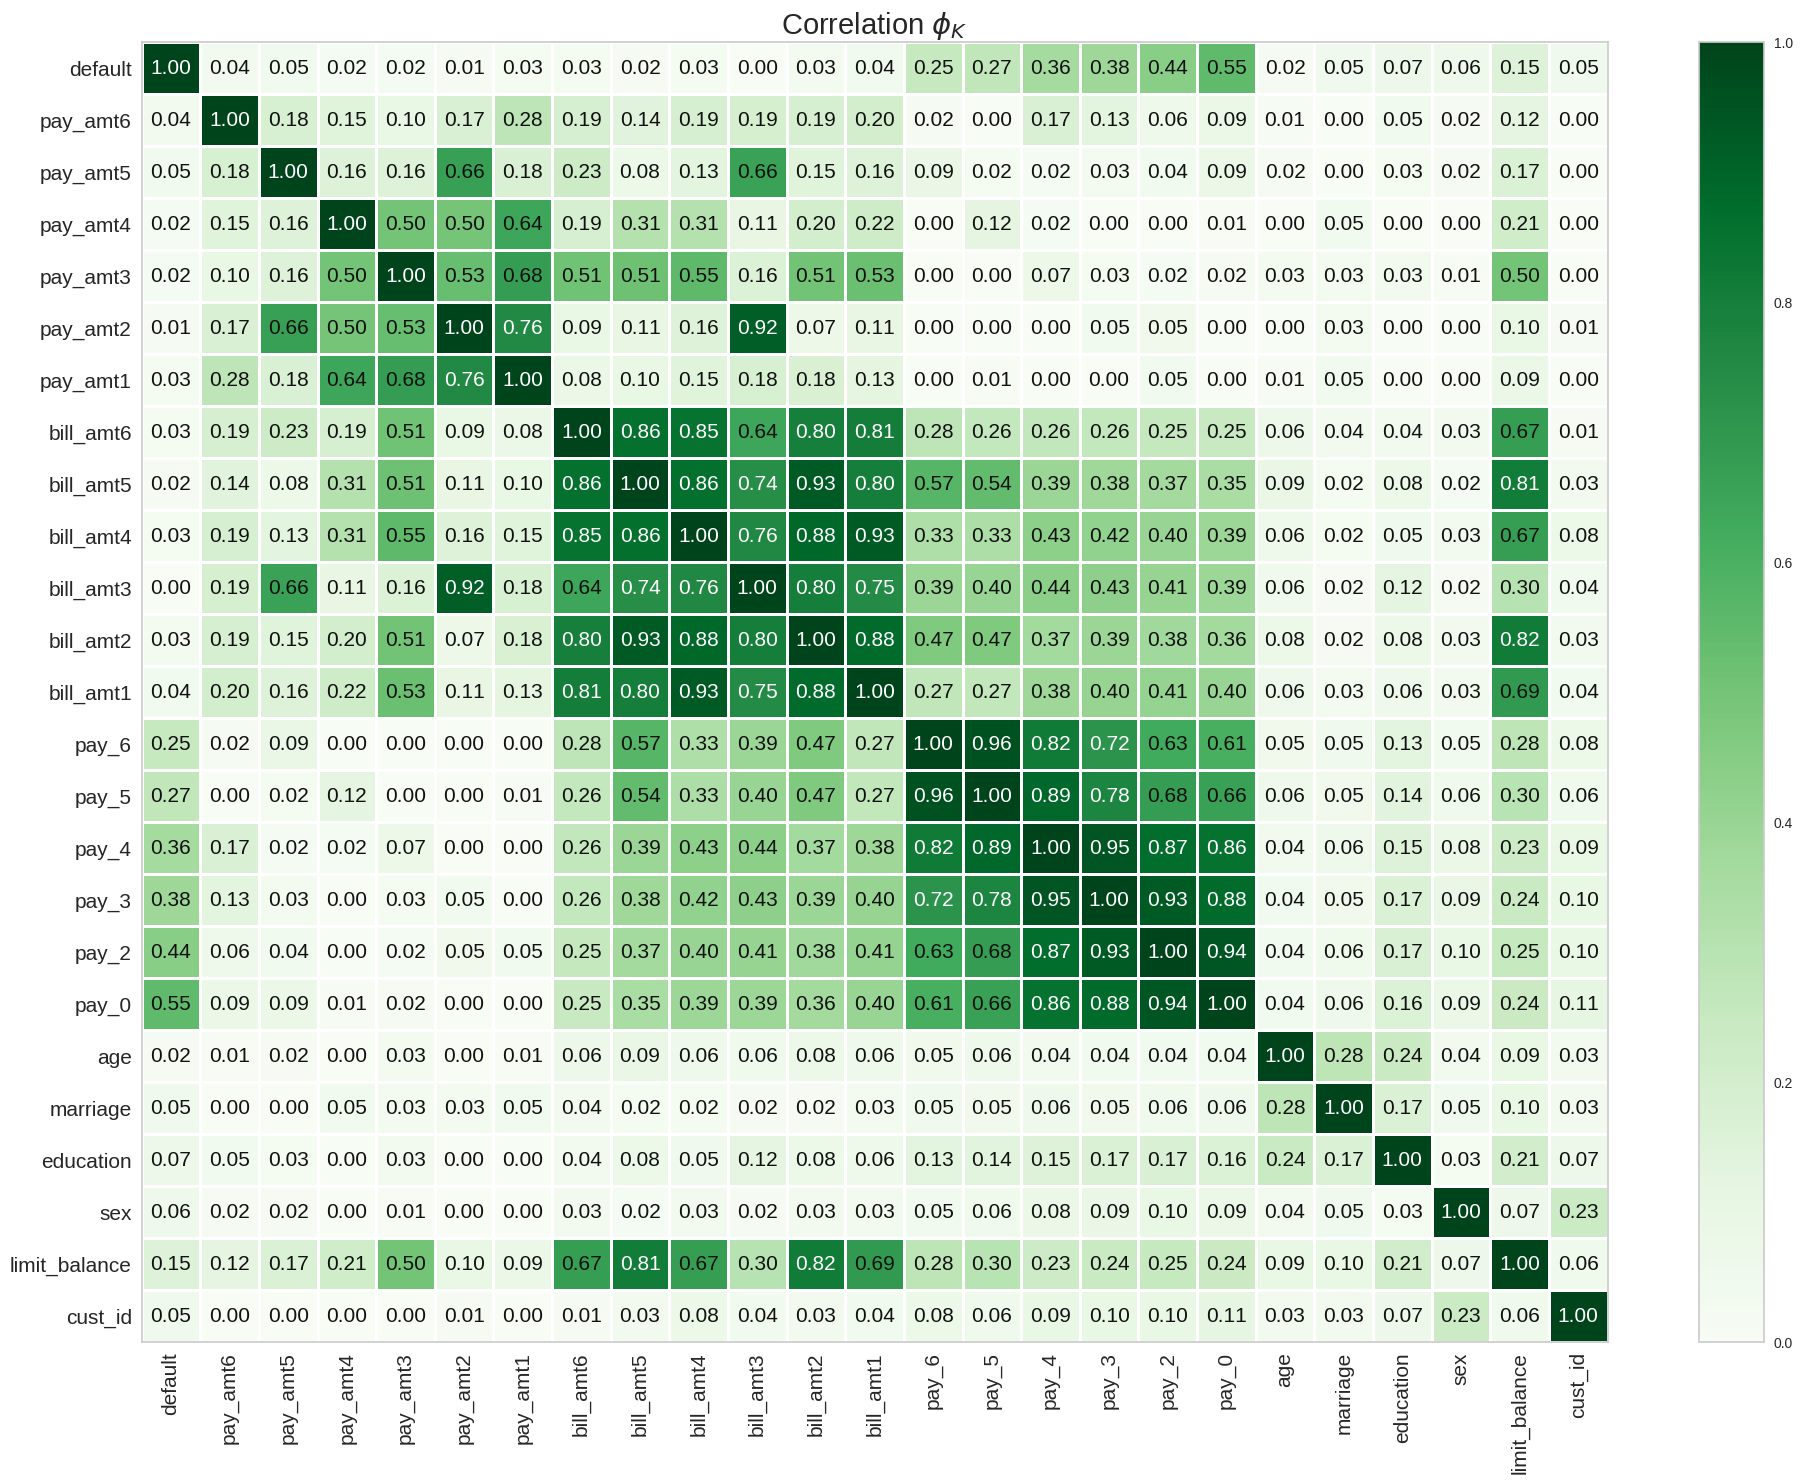

In [27]:
# To see if there's any features that has a strong correlation to getting default.

plot_correlation_matrix(df_eda.phik_matrix().values,
                        x_labels=df_eda.phik_matrix().columns,
                        y_labels=df_eda.phik_matrix().index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(20, 15))
plt.tight_layout()

The variables that strongly impact the 'default' column are primarily located within the payment-related columns, including 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', and 'limit_balance'. These variables are the most influential predictors of default payment. Consequently, the analyst will consider columns with a minimum threshold of 0.10 as potential features for feature selection.

In [28]:
#Selecting new columns based on the highest correlation.
df_select = df_raw[['limit_balance','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','default']]
df_select

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default
0,20000.0,2,2,-1,-1,-2,-2,1
1,120000.0,-1,2,0,0,0,2,1
2,90000.0,0,0,0,0,0,0,0
3,50000.0,0,0,0,0,0,0,0
4,50000.0,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...
29995,220000.0,0,0,0,0,0,0,0
29996,150000.0,-1,-1,-1,-1,0,0,0
29997,30000.0,4,3,2,-1,0,0,1
29998,80000.0,1,-1,0,0,0,-1,1


In [29]:
#Checking cardinality
df_select.nunique()

limit_balance    81
pay_0            11
pay_2            11
pay_3            11
pay_4            11
pay_5            10
pay_6            10
default           2
dtype: int64

In [30]:
#Outliers handling
def diagnostic_plots(df_select, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_select[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_select[variable])
    plt.title('Boxplot')

    plt.show()

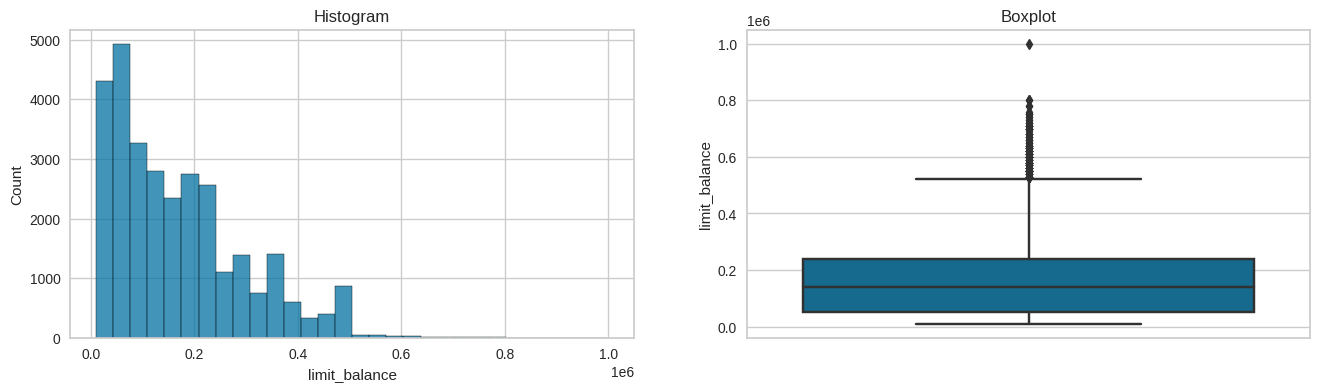


Skewness Value :  0.992866960519544


In [31]:
#Checking if there's any outliers in column 'limit_balance'
diagnostic_plots(df_select, 'limit_balance')
print('\nSkewness Value : ', df_select['limit_balance'].skew())

A skewness value of 0.99 indicates that the distribution of the data is positively skewed.

### *Split Train and Test*

In [32]:
# Split between x as features and y as target

X = df_select.drop('default', axis=1)
y = df_select['default']
X

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,20000.0,2,2,-1,-1,-2,-2
1,120000.0,-1,2,0,0,0,2
2,90000.0,0,0,0,0,0,0
3,50000.0,0,0,0,0,0,0
4,50000.0,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...
29995,220000.0,0,0,0,0,0,0
29996,150000.0,-1,-1,-1,-1,0,0
29997,30000.0,4,3,2,-1,0,0
29998,80000.0,1,-1,0,0,0,-1


In [33]:
#Assigning train size and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (22500, 7)
Test Size  :  (7500, 7)


In [34]:
y.value_counts() #Checking the data proportion

0    23364
1     6636
Name: default, dtype: int64

The data is imbalance.

### *Finding the best model with Pycaret*

The reason why analyst decided to use PyCaret because it offers a time-saving and user-friendly solution for the entire machine learning workflow. It automates tasks like data preprocessing, model selection, hyperparameter tuning, and evaluation. With built-in tools for EDA and automated hyperparameter search, PyCaret simplifies complex processes. Additionally, it provides a standardized approach to model comparison and result tracking, enhancing reproducibility and facilitating quicker decision-making in model selection and deployment.

In [35]:
from pycaret.classification import *

In [36]:
#Split between x as features and y as target
X = df_select.drop('default', axis=1)
y = df_select['default']

In [37]:
#Assigning train size and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (22500, 7)
Test Size  :  (7500, 7)


In [38]:
y.value_counts() #Checking the data proportion

0    23364
1     6636
Name: default, dtype: int64

The data seems to be imbalanced.

#### Preprocessing

In [39]:
#Categorical Pipeline
cat_pipe = Pipeline([
    ('ordinal_enc', OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                               [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                               [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                               [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                               [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                               [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]))
])

cat_tr = cat_pipe.fit_transform(X_train[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])

cat_tr

array([[3., 4., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 4.],
       [4., 4., 4., 0., 0., 0.],
       ...,
       [2., 2., 4., 4., 4., 4.],
       [2., 2., 2., 4., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [40]:
#Trimming outliers and scaling

#Numerical Pipeline
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

#Fold 1.5 because the outliers were not extreme, and using 'IQR' along with MinMaxScaler for the skewed distribution.

#Fit transform numerical pipeline
num_tr = num_pipe.fit_transform(X_train[['limit_balance']])
num_tr

array([[0.36893204],
       [0.03883495],
       [0.23300971],
       ...,
       [0.13592233],
       [0.31067961],
       [0.0776699 ]])

In [41]:
# Combine both pipelines using ColumnTransformer
full_pipe = ColumnTransformer([
    ("cat", cat_pipe, ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']),
    ("num", num_pipe, ['limit_balance'])
])

# Fit and transform the data using the combined pipeline
train_tr = full_pipe.fit_transform(X_train)

In [42]:
#Fit transform Test model
test_tr = full_pipe.transform(X_test)
test_tr

array([[2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        0.38834951],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        0.13592233],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        0.03883495],
       ...,
       [4.        , 4.        , 4.        , ..., 2.        , 2.        ,
        0.7961165 ],
       [3.        , 4.        , 4.        , ..., 2.        , 2.        ,
        0.23300971],
       [3.        , 4.        , 2.        , ..., 2.        , 2.        ,
        0.03883495]])

In [43]:
#Wanted to see the index on the categorical data
train_tr = pd.DataFrame(full_pipe.fit_transform(X_train))
train_tr

,0,1,2,3,4,5,6
0,3.0,4.0,2.0,2.0,2.0,2.0,0.368932
1,2.0,2.0,2.0,2.0,2.0,4.0,0.038835
2,4.0,4.0,4.0,0.0,0.0,0.0,0.233010
3,2.0,2.0,2.0,2.0,2.0,2.0,0.854369
4,2.0,2.0,2.0,2.0,2.0,2.0,0.601942
...,...,...,...,...,...,...,...
22495,3.0,5.0,4.0,4.0,5.0,4.0,0.058252
22496,4.0,4.0,4.0,4.0,4.0,4.0,0.116505
22497,2.0,2.0,4.0,4.0,4.0,4.0,0.135922
22498,2.0,2.0,2.0,4.0,2.0,2.0,0.310680


In [44]:
#Handling imbalance data with oversampling (SMOTENC)

#List of indices for categorical features
categorical_indices = [0, 1, 2, 3, 4, 5]

#Initialize SMOTENC to handle imbalance data
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)

#Apply SMOTENC to the training data
train_tr_smotenc, y_train_smotenc = smotenc.fit_resample(train_tr, y_train)

In [45]:
y_train_smotenc.value_counts()

0    17523
1    17523
Name: default, dtype: int64

The data has been balanced.

In [46]:
#Pipeline with balanced data
final_pipe = Pipeline([
            ('preprocess', full_pipe),
            ('over_sampling', SMOTENC([0, 1, 2, 3, 4, 5], random_state=42))
])

final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               

In [47]:
#Convert y to a numpy array and combine X and y using np.concatenate
py_raw = np.concatenate((train_tr_smotenc, y_train_smotenc.values.reshape(-1, 1)), axis=1)
py_raw

array([[3.        , 4.        , 2.        , ..., 2.        , 0.36893204,
        0.        ],
       [2.        , 2.        , 2.        , ..., 4.        , 0.03883495,
        0.        ],
       [4.        , 4.        , 4.        , ..., 0.        , 0.23300971,
        1.        ],
       ...,
       [3.        , 4.        , 4.        , ..., 4.        , 0.0776699 ,
        1.        ],
       [1.        , 2.        , 2.        , ..., 2.        , 0.11850912,
        1.        ],
       [2.        , 2.        , 2.        , ..., 2.        , 0.11650485,
        1.        ]])

In [48]:
#Converting it into data frame including Target
py_df = pd.DataFrame(py_raw)
py_df

,0,1,2,3,4,5,6,7
0,3.0,4.0,2.0,2.0,2.0,2.0,0.368932,0.0
1,2.0,2.0,2.0,2.0,2.0,4.0,0.038835,0.0
2,4.0,4.0,4.0,0.0,0.0,0.0,0.233010,1.0
3,2.0,2.0,2.0,2.0,2.0,2.0,0.854369,0.0
4,2.0,2.0,2.0,2.0,2.0,2.0,0.601942,0.0
...,...,...,...,...,...,...,...,...
35041,0.0,0.0,0.0,0.0,0.0,0.0,0.621359,1.0
35042,2.0,1.0,1.0,0.0,0.0,0.0,0.186207,1.0
35043,3.0,4.0,4.0,4.0,4.0,4.0,0.077670,1.0
35044,1.0,2.0,2.0,2.0,2.0,2.0,0.118509,1.0


In [49]:
#Initialize PyCaret setup
clf_setup = setup(data=py_df, target='7')

,Description,Value
0,Session id,7307
1,Target,7
2,Target type,Binary
3,Original data shape,"(35046, 8)"
4,Transformed data shape,"(35046, 8)"
5,Transformed train set shape,"(24532, 8)"
6,Transformed test set shape,"(10514, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [50]:
#Compare models and select the best one
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7696,0.8382,0.6710,0.8359,0.7443,0.5392,0.5501,1.5420
lightgbm,Light Gradient Boosting Machine,0.7575,0.8227,0.6601,0.8198,0.7313,0.5150,0.5251,1.0630
et,Extra Trees Classifier,0.7484,0.8046,0.6560,0.8047,0.7227,0.4967,0.5055,1.8290
dt,Decision Tree Classifier,0.7451,0.7863,0.6474,0.8048,0.7175,0.4903,0.5000,0.0940
rf,Random Forest Classifier,0.7438,0.8094,0.6604,0.7928,0.7204,0.4877,0.4947,2.0200
gbc,Gradient Boosting Classifier,0.7291,0.7921,0.6112,0.7998,0.6928,0.4582,0.4715,1.4160
ada,Ada Boost Classifier,0.7038,0.7614,0.5779,0.7724,0.6611,0.4076,0.4212,0.6660
knn,K Neighbors Classifier,0.6981,0.7609,0.7103,0.6937,0.7017,0.3963,0.3966,1.0160
qda,Quadratic Discriminant Analysis,0.6908,0.7138,0.6448,0.7101,0.6758,0.3816,0.3833,0.1270
nb,Naive Bayes,0.6895,0.7316,0.5309,0.7774,0.6308,0.3789,0.3996,0.0670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Based on the analysis conducted using Pycaret, the 'xgboost' model demonstrated the highest f1 score compared to other models. The choice of using the 'f1 score' as the evaluation metric was driven by the analyst's consideration that both classes hold equal importance in the context. This is because false negatives represent instances where customers who should have been predicted as default are instead classified as non-default (which poses a risk, as it may lead to financial losses for the bank). Conversely, false positives indicate cases where customers who are actually non-default are predicted as default (which is concerning, as it could potentially result in customers terminating their banking services unexpectedly due to sudden account restrictions).

In [51]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7661,0.8322,0.6610,0.8369,0.7386,0.5322,0.5444
1,0.7861,0.8504,0.6887,0.8553,0.7630,0.5721,0.5833
2,0.7534,0.8259,0.6444,0.8238,0.7231,0.5067,0.5191
3,0.7746,0.8514,0.6680,0.8487,0.7476,0.5491,0.5620
4,0.7758,0.8382,0.6721,0.8477,0.7498,0.5515,0.5638
5,0.7725,0.8440,0.6925,0.8243,0.7527,0.5450,0.5521
6,0.7774,0.8430,0.6838,0.8415,0.7545,0.5549,0.5649
7,0.7574,0.8321,0.6585,0.8211,0.7309,0.5149,0.5253
8,0.7664,0.8380,0.6764,0.8250,0.7434,0.5329,0.5417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Achieving an average f1 score of 0.7442 implies that the model has the capability to make predictions with an accuracy of approximately 74%.

In [52]:
#Tune the hyperparameters of the best model
tuned_model = tune_model(xgb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.8134,0.6235,0.8279,0.7113,0.4939,0.5097
1,0.7677,0.8233,0.6610,0.8404,0.7400,0.5355,0.5481
2,0.7318,0.8012,0.6052,0.8100,0.6928,0.4635,0.4790
3,0.7456,0.8175,0.6338,0.8162,0.7135,0.4912,0.5039
4,0.7521,0.8200,0.6281,0.8351,0.7169,0.5042,0.5205
5,0.7631,0.8304,0.6754,0.8190,0.7403,0.5263,0.5345
6,0.7517,0.8207,0.6544,0.8128,0.7251,0.5035,0.5133
7,0.7456,0.8122,0.6406,0.8111,0.7158,0.4913,0.5025
8,0.7452,0.8147,0.6349,0.8149,0.7137,0.4905,0.5029


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


It appears that the mean F1 score has decreased after tuning, going from 0.7442 before tuning to 0.7189 after tuning using Pycaret. This decrease may be attributed to several factors, such as suboptimal parameter settings during tuning or the variation of algorithms used in tuning that might not align well with the data's characteristics.

In this context, model tuning involves efforts to optimize certain parameters to enhance the model's performance. However, tuning outcomes do not always lead to performance improvements. At times, tuning can alter parameters in a way that doesn't align with the data, thus negatively affecting performance.

In [53]:
#Print the best hyperparameters
print(tuned_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
#Evaluate the tuned model on the test set
predictions = predict_model(tuned_model, data=pd.DataFrame(test_tr))

In [55]:
predictions

,0,1,2,3,4,5,6,prediction_label,prediction_score
0,2.0,2.0,2.0,2.0,2.0,2.0,0.388350,0,0.7725
1,2.0,2.0,2.0,2.0,2.0,2.0,0.135922,0,0.7067
2,2.0,2.0,2.0,2.0,2.0,2.0,0.038835,0,0.5786
3,1.0,1.0,0.0,0.0,1.0,1.0,0.174757,0,0.8251
4,4.0,1.0,1.0,1.0,1.0,1.0,0.330097,0,0.5385
...,...,...,...,...,...,...,...,...,...
7495,4.0,5.0,4.0,2.0,2.0,2.0,0.077670,1,0.8492
7496,1.0,1.0,1.0,1.0,1.0,0.0,0.368932,0,0.7198
7497,4.0,4.0,4.0,2.0,2.0,2.0,0.796117,1,0.9553
7498,3.0,4.0,4.0,4.0,2.0,2.0,0.233010,1,0.5753


As demonstrated, the model has proficiently anticipated the label in the 'prediction_label' column.

#### Manually Modeling

In [56]:
#Models to compare
rfc = RandomForestClassifier(random_state=0)
xgb_class = xgb.XGBClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7c6898e5aec0>


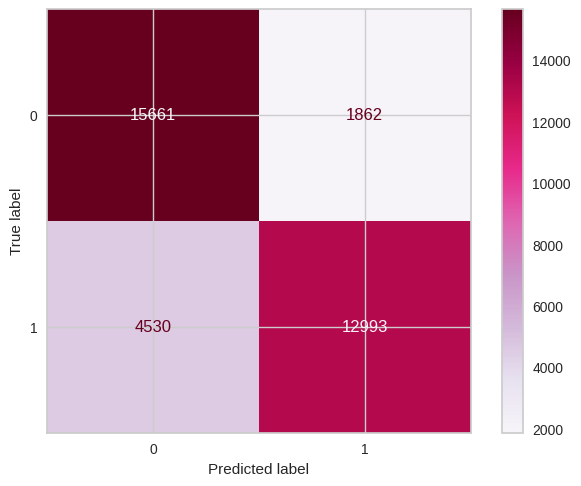

In [57]:
#RandomForestClassifier

rfc.fit(train_tr_smotenc, y_train_smotenc)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(rfc, train_tr_smotenc, y_train_smotenc, cmap='PuRd'))

In [58]:
#Cross-validation - RFC

f1_scorer = make_scorer(f1_score)

rfc_pipe = Pipeline([
        ('model', RandomForestClassifier(random_state=0))
    ])

scores_f1_rfc = cross_val_score(rfc_pipe, train_tr_smotenc, y_train_smotenc,
                                scoring=f1_scorer, cv=skfold)

print(scores_f1_rfc)
print("Mean F1 Score RFC:", scores_f1_rfc.mean())

[0.7256386  0.72278619 0.72897196 0.72682324 0.72020075]
Mean F1 Score RFC: 0.7248841495576801


Confusion Matrix XGBoost   : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7c6898e9bac0>


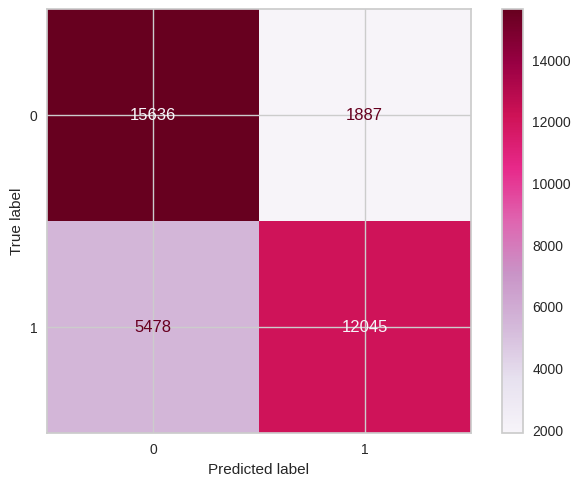

In [59]:
#XGBoost

xgb_class.fit(train_tr_smotenc, y_train_smotenc)

xgb_train = xgb_class.predict(train_tr)
xgb_test = xgb_class.predict(test_tr)

#Confussion matrix display
print('Confusion Matrix XGBoost   :', ConfusionMatrixDisplay.from_estimator(xgb_class, train_tr_smotenc, y_train_smotenc, cmap='PuRd'))

In [60]:
#Cross-validation - XGBoost

f1_scorer = make_scorer(f1_score)

xgb_pipe = Pipeline([
        ('model', xgb.XGBClassifier(random_state=0))
    ])

scores_f1_xgb = cross_val_score(xgb_pipe, train_tr_smotenc, y_train_smotenc,
                                scoring=f1_scorer, cv=skfold)

print(scores_f1_xgb)
print("Mean F1 Score XGB:", scores_f1_xgb.mean())


[0.74450682 0.74112636 0.75913568 0.74533772 0.74513557]
Mean F1 Score XGB: 0.7470484298623215


As we can re-confirmed that XG Boost received the highest F1 score.

Confusion Matrix Decision Tree    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7c6898e99210>


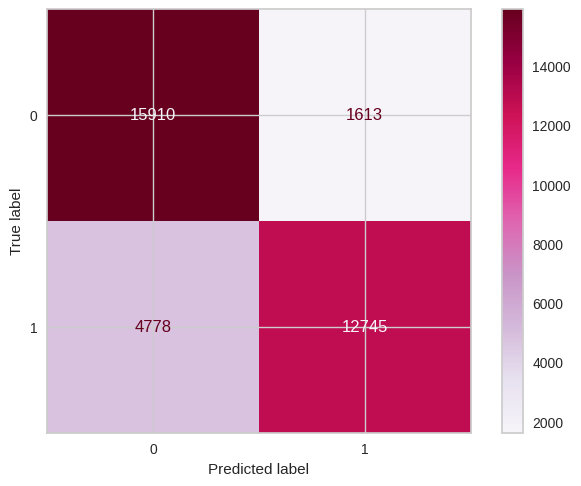

In [61]:
#DecisionTree

dt.fit(train_tr_smotenc, y_train_smotenc)

dt_train = dt.predict(train_tr)
dt_test = dt.predict(test_tr)

#Confussion matrix display
print('Confusion Matrix Decision Tree    :', ConfusionMatrixDisplay.from_estimator(dt, train_tr_smotenc, y_train_smotenc, cmap='PuRd'))

In [62]:
#Cross-validation - DecisionTree

f1_scorer = make_scorer(f1_score)

dt_pipe = Pipeline([
        ('model', DecisionTreeClassifier(random_state=0))
    ])

scores_f1_dt = cross_val_score(dt_pipe, train_tr_smotenc, y_train_smotenc,
                                scoring=f1_scorer, cv=skfold)

print(scores_f1_dt)
print("Mean F1 Score Decision Tree:", scores_f1_dt.mean())


[0.72185958 0.71617109 0.73032299 0.72411636 0.71970663]
Mean F1 Score Decision Tree: 0.7224353291771253





---


> Mean F1 Score RFC: 0.7248841495576801

> Mean F1 Score XGB: 0.7470484298623215

> Mean F1 Score Decision Tree: 0.7224353291771253

The comparison of average F1 scores shows that the XGBoost model performs the best, getting a score of around 0.747. This tells us it's really good at predicting even when the data is not balanced and has complex patterns. The Random Forest Classifier comes next with a score of about 0.725, which means it's good at finding a middle ground between getting things wrong in different ways. The Decision Tree model is a bit behind with a score of around 0.722, showing it's okay at telling the difference between people who might default and those who won't. Overall, XGBoost emerges as the top-performing model based on the F1 scores.

Therefore I'll use XGboost as the baseline model for this model prediction.



##### Hyperparameter Tuning

In [63]:
xgb_class = xgb.XGBClassifier(random_state=0)

#Define the pipeline with XGBoost and SMOTE
xgb_pipe = ImbPipeline([
    ('preprocess', full_pipe),
    ('over_sampling', SMOTENC([0, 1, 2, 3, 4, 5],random_state=42)),
    ('model', xgb_class)
])

#Define hyperparameter tuning combinations
params = [
    {
        'model__n_estimators': [50, 70, 90],
        'model__learning_rate': [0.1, 0.5, 1.0]
    }
]

#Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_pipe, params, cv=skfold,
                                scoring=f1_scorer,
                                return_train_score=True)

grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('ordinal_enc',
                                                                                          OrdinalEncoder(categories=[[-2,
                                                                                                                      -1,
                                                                                                                      0,
                                                                                                                      1,
                                                                                                                      2,
                                                                                                                      3,
                                                                                                                      4,
                                                                                                                      5,
                                                                                                                      6,
                                                                                                                      7,
                                                                                                                      8],...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='binary:logistic',
                                                      predictor=None, ...))],
                                verbose=False),
             n_jobs=None,
             param_grid=[{'model__learning_rate': [0.1, 0.5, 1.0],
                          'model__n_estimators': [50, 70, 90]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(f1_score), verbose=0)

In [64]:
xgb_class = xgb.XGBClassifier(random_state=0)

grid_search_xgb = GridSearchCV(xgb_pipe, params, cv=skfold, scoring=f1_scorer, return_train_score=True)
grid_search_xgb.fit(X_train, y_train)

print('XGBoost:')
print(f'Best cross-validation F1 score: {grid_search_xgb.best_score_:.2f}')
print(f'F1 score test set score: {f1_score(y_test, grid_search_xgb.predict(X_test)):.2f}')
print(f'Best parameters: {grid_search_xgb.best_params_}')

XGBoost:
Best cross-validation F1 score: 0.53
F1 score test set score: 0.53
Best parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 50}


Evidently demonstrated by the declining f1 score on the test set, when compared to the non-tuned model, this observation may be attributed to the modifications made during the hyperparameter tuning process. The optimization of hyperparameters aims to enhance the model's performance by adjusting its internal settings. However, in some cases, improper parameter combinations or constraints may inadvertently lead to a decrease in performance on the test set. This underscores the importance of careful and thoughtful hyperparameter tuning to strike the right balance between improving and potentially degrading the model's predictive capabilities.

### Save Model

In [65]:
#Combining pipeline with model
all_process = Pipeline([
    ("preprocess", full_pipe),
    ("classification", xgb.XGBClassifier(random_state=0))
])

all_process.fit(X_train, y_train)
result = all_process.predict(X_test)

In [66]:
#Saving model
joblib.dump(all_process, open('danamonclas.pkl', 'wb'))

### Conclusion

To conclude, the analysis conducted with PyCaret and manual revealed that the 'xgboost' model performed the best in terms of the f1 score, which is a suitable metric given the equal importance of both prediction classes. The attained mean f1 score of 0.7442 indicates an accuracy of around 74%.

However, it's important to note that the mean f1 score slightly decreased to 0.7189 after tuning, possibly due to suboptimal parameter choices or algorithm variations.

To improve model performance, further exploration of hyperparameter settings, alternative algorithms, and more comprehensive feature engineering could be considered. Additionally, a deeper understanding of the data and potential imbalances could contribute to better model fine-tuning.



---

The Bank Danamon credit card dataset analysis uncovered important findings. Female customers dominate the dataset, with an average balance of around 167,484 million New Taiwan dollars. Students form a significant portion, mainly holding 'University' education. Customer ages range from 21 to 79, spanning April to August 2005.

The pie chart highlights 60.4% female customers and emphasizes timely payments, given a 22.1% credit card default rate.

A dataset imbalance shows 23,364 non-default and 6,636 default instances. Higher credit limits relate to lower default rates, implying credit limits' role in responsible payments.

Customer distribution reveals a substantial Young Adults group (21-39 years), followed by Adults (40-59 years) and a smaller Retirees subset (60+ years). Defaults are more common among Young Adults and Adults.


As an analyst here's a couple of suggestions for improvement:

*    **Tailored Strategies:** Based on the age group distribution, Bank Danamon could develop customized financial products and services that cater to the specific needs and preferences of different customer segments. For instance, targeting retirement planning services for the Retiree age group and offering financial education for Young Adults might enhance customer satisfaction.

*    **Preventing Defaults Program:** To address the issue of defaults, the bank could consider implementing proactive communication and reminders to customers about payment due dates. Educating customers about the potential consequences of defaults and offering assistance during financial difficulties could help minimize default rates.

*    **Credit Limit Adjustments:** Given the observed relationship between credit limits and default behavior, the bank could evaluate the possibility of offering higher credit limits to customers with strong credit histories. This approach might encourage responsible credit card usage and reduce the likelihood of defaults.

*    **Targeted Marketing:** Utilizing the insights gained from the analysis, the bank can tailor its marketing efforts to each age group's preferences and needs. This approach could increase customer engagement and loyalty.

*    **Credit Education Initiatives:** Implementing credit education programs targeted at Young Adults could help them understand the importance of credit management, leading to improved financial literacy and reduced default rates.

*    **Continuous Monitoring:** Continuously monitoring default rates and conducting periodic analyses can provide insights into the effectiveness of implemented strategies and guide adjustments as needed to achieve the bank's goal of reducing defaults.


In summary, the analysis provides valuable understandings regarding customer demographics, default trends, and spending habits. Implementing the proposed strategies will enable Bank Danamon to enhance customer contentment, reduce default vulnerabilities, and optimize services across diverse customer segments.